chromosome	start	end	num_motifs_in_group	called_sites	called_sites_methylated	methylated_frequency	group_sequence

chromosome	start	end	num_motifs_in_group	called_sites	called_sites_methylated	methylated_frequency	group_sequence



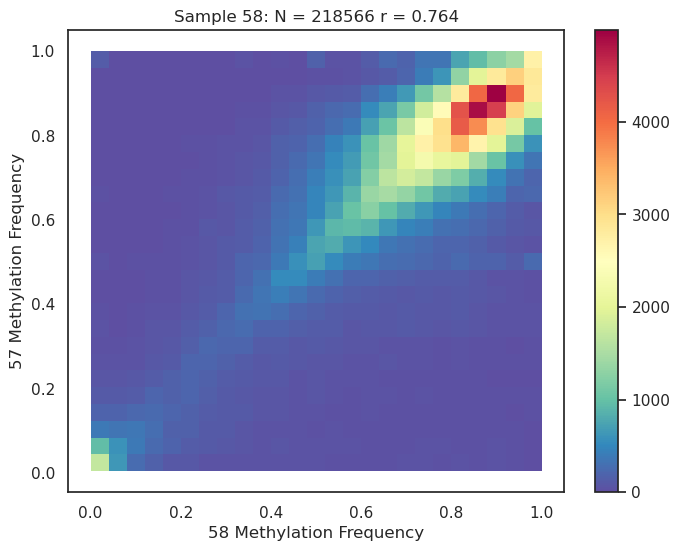

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
f1_res = defaultdict(dict)
f2_res = defaultdict(dict)
data_p = {
    'frequency_1': [],
    'frequency_2': []
}
with open("58/flye_3000/methylation_frequency.tsv", "r") as f1:
    print (next(f1))
    for line in f1:
        data = line.split()
        ctg = data[0]
        start = data[1]
        end = data[2]
        freq = float(data[6])
        f1_res[ctg]["{}_{}".format(start, end)] = freq
with open("58/flye_3000/methylation_frequency_57.tsv", "r") as f1:
    print (next(f1))
    for line in f1:
        data = line.split()
        ctg = data[0]
        start = data[1]
        end = data[2]
        freq = float(data[6])
        f2_res[ctg]["{}_{}".format(start, end)] = freq
for ctg in f1_res.keys():
    ctg2 = f2_res.get(ctg, None)
    if ctg2:
        for p1 in f1_res[ctg].keys():
            p2 = f2_res[ctg].get(p1, None)
            if p2:
                data_p['frequency_1'].append(f1_res[ctg][p1])
                data_p['frequency_2'].append(f2_res[ctg][p1])
# Load data from the "freq.tsv" file
df = pd.DataFrame(data_p)

# Calculate the correlation coefficient
correlation_coefficient = df['frequency_1'].corr(df['frequency_2'])

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.set(style="white")  # Use a white background

# Plot the heatmap
sns.histplot(df, x='frequency_1', y='frequency_2', bins=25, cmap="Spectral_r", cbar=True)

# Set axis labels and title
plt.xlabel("58 Methylation Frequency")
plt.ylabel("57 Methylation Frequency")
plt.title(f"Sample 58: N = {len(df)} r = {correlation_coefficient:.3f}")

plt.show()